# Naive Bayes for Spam Classification

## Introduction

Naive bayes is a relatively simple probabilistic classfication algorithm that is well suitable for categorical data (probabilities can be compuated as simple ratios) and uses the bayes theorem together with a strong (hence "naive") independence assumption. The basic idea behind Naive Bayes is that it assigns a probability to every category (finite outcome variable) based on the features in the data and chooses the outcome that is most likely as its prediction.

The "Naive" in the name refers to the algorithm assuming features in the data are independent conditional on the outcome category. For example suppose we were doing spam text classification, then given a spam text "Free, sign up now!", Naive Bayes would assume "Free", "sign", "up, "now" all occur indepedently of each other (that is $Pr(Free, sign, up, now|spam)$ = $Pr(Free|spam)\times Pr(sign|spam)\times Pr(up|spam) \times Pr(now|spam)$). This conditional independence assumption is considered to be a strong assumption that often doesn't hold in practice, hence the resulting probabilities from Naive Bayes are not to be taken too seriously. However the classifications resulting from Naive Bayes can still be accurate. 

In machine learning, common application of Naive Bayes are spam email classification, sentiment analysis, document categorization. Naive bayes is advantageous over other commonly used classification algorithms in its simplicity, speed, and its accuracy on small data sets. Since Naive Bayes needs to be trained on a labeled data set it considered to a supervisd learning algorithm. 

## Introducing Bayes Theorem

Consider two events, $A$ and $B$. For example $A$ could be a set of words found in many emails, and $B$ could be a set that has two categories, spam or ham (legitimate email). Then we might be interested in computing the $Pr(A = FREE|B = spam)$, which is the probability of a spam email containing the word "FREE". In general, let us try to come up with a formula for the conditional $Pr(A|B).$

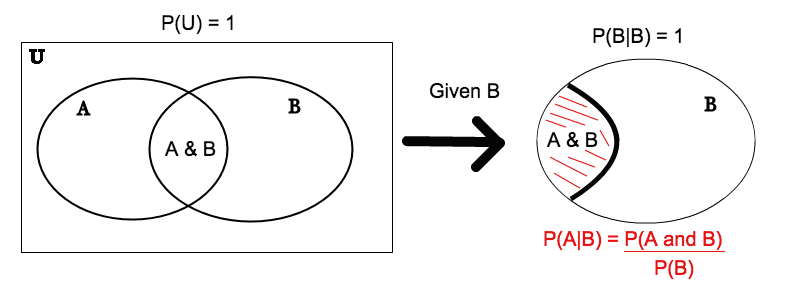

In [10]:
from IPython.display import Image, display
display(Image(filename='vendiagram.png', embed=True))

The figure above on the left illustrates a ven diagram of the sample space U (U is for "universe"), event A, and event B. For example in a die roll, $U = \{1,2,3,4,5,6\},$ $A$ = Roll even number, $B$ = roll 4 or 6. By definition we have $Pr(U) = 1,$ but suppose we know event $B$ has occured, that takes us to the right figure. Now B is the new sample space (because we know we are in B), and are interested in computing the probability of also being in $A$ at the same time. This mean we find to the probability of being in $A$ and $B$ given that we are in $B$, this the red shaded region on the right figure above. It's easy to see from the right figure that $$Pr(A|B) = \frac{\text{Area of A and B}}{\text{Area of B}} = \frac{Pr(A \text{ and } B)}{Pr(B)}.$$ Note that we can have similar argument for finding $$Pr(B|A) = \frac{\text{Area of A and B}}{\text{Area of A}} = \frac{Pr(A \text{ and } B)}{Pr(A)}.$$

From the above argument we have shown that $P(A \text{ and } B) = P(A|B)P(B) = P(B|A)P(A),$ and hence now we can compute $$Pr(A|B) = \frac{P(B|A)P(B)}{P(A)},$$ this is the Bayes theorem. The $Pr(B)$ is known as the "prior probability", for example the prior probabiling of a coin landing on heads could be $0.5.$ Whereas the $Pr(B|A)$ is often known as the "likelihood", this is a measure of how much we trust our result $B$ given $A$. Finally $Pr(A)$ is the "marginal" probability of $A$. Essentially the bayes rule is a realatively easy formula for finding conditional probabilities. 

## Formulating Naive Bayes

Suppose we have a data set where each observation $i$ belongs to a category from the finite set $C_{i} = \{c_{1i},c_{2i},\ldots, c_{ki}\},$ and consists of several features $W_{i} = \{w_{1i},\ldots,w_{mi}\}.$ If we could find probabilities $Pr(c_{1i}|W_{i}), Pr(c_{2i}|W_{i}), \ldots, Pr(c_{ki}|W_{i}),$ then we could predict the label for observation $i$ to be the one that has the highest probability. 

To compute conditional probabilities, we can use the Bayes theorem from statistics which says, $$Pr(c_{ji}|W_{i}) = \frac{Pr(c_{ji} \text{ and } W_{i})}{Pr(W_{i})} = \frac{Pr(W_{i}|c_{ji})Pr(c_{ji})}{Pr(W_{i})},$$ where $j = 1, 2, \ldots, k.$ Usually $Pr(W_{i})$ and $Pr(c_{ji})$ are either well known, or can be estimated easily from the data. However $Pr(W_{i}|c_{ji})$ is a another conditional probability that we need to find and using Bayes rule again will not help here. This is were the "Naive" part steps in, we assume that the data features $w_{1i}, w_{2i}, \ldots, w_{mi}$ are all independent of each other conditional on knowing the class $c_{ji}.$ Statistically that means $$Pr(W_{i}|c_{ji}) = Pr(w_{1i}, w_{2i}, \ldots, w_{mi}|c_{ji}) = Pr(w_{1i}|c_{ji})Pr(w_{2i}|c_{ji}) \ldots Pr(w_{mi}|c_{ji}).$$ Given this result from the "Naive" assumption of conditional indepdence, we can compute $$Pr(c_{ji}|W_{i}) = \frac{Pr(W_{i}|c_{ji})Pr(c_{ji})}{Pr(W_{i})} = \frac{Pr(w_{1i}|c_{ji})Pr(w_{2i}|c_{ji}) \ldots Pr(w_{mi}|c_{ji})Pr(c_{ji})}{Pr(W_{i})}.$$ 

In many problems we can find $Pr(w_{li}|c_{ji})$ for $l = 1,\ldots,m$ by using $$Pr(w_{li}|c_{ji}) = \frac{Pr(w_{li} \text{ and } c_{ji})}{Pr(c_{ji})}.$$ Therefore we can find the probability of each class occuring given features in the data, $Pr(c_{1i}|W_{i}),Pr(c_{2i}|W_{i}), \ldots, Pr(c_{ki}|W_{i}).$ Next we can just compare all of these probabilities to each other, and pick the class that is most likely. Also note that we can omit $Pr(W_{i})$ in the denominator above because it is common to all the conditional class probabilities and will not effect their rankings, that is if $$\frac{Pr(w_{1i}|c_{1i}) \ldots Pr(w_{mi}|c_{1i})Pr(c_{1i})}{Pr(W_{i})} > \frac{Pr(w_{1i}|c_{2i}) \ldots Pr(w_{mi}|c_{2i})Pr(c_{2i})}{Pr(W_{i})} \implies $$ $$Pr(w_{1i}|c_{1i}) \ldots Pr(w_{mi}|c_{1i})Pr(c_{1i}) > Pr(w_{1i}|c_{2i}) \ldots Pr(w_{mi}|c_{2i})Pr(c_{2i}). $$

## Data Description

We will be using a data from the UCI machine learning repository that countains several Youtube comments from very popular music videos. Each comment in the data has been labeled as either spam or ham (legitimate comment), we will use this data to train our Naive Bayes algorithm for youtube comment spam classification. 

In [11]:
# Import modules
# For data manipulation
import pandas as pd
# For matrix operations
import numpy as np
# For numerical division
from __future__ import division
# For regular expression (text cleaning)
import re

In [12]:
# Load data set and display a few observations
data_comments = pd.read_csv('YoutubeComments.csv')

# Create column labels
data_comments.columns = ["content","label"]
data_comments.head()

,content,label
0,+447935454150 lovely girl talk to me xxx,1
1,I always end up coming back to this song<br />,0
2,"my sister just received over 6,500 new <a rel=...",1
3,Cool,0
4,Hello I am from Palastine,1


We only have two variables in our data, the youtube comment and its label of being spam or legitimate. We already know that a legitimate comment would be one relating to the video itself, let's get a sense of what spam comments look like. $\textbf{WARNING: Please DO NOT go on the links in the spam comments below as they might be unsafe.}$

In [13]:
# Show spam comments in data
# DO NOT GO ON THE LINKS BELOW!!!
print data_comments["content"][data_comments["label"] == 1]

0                +447935454150 lovely girl talk to me xxx
2       my sister just received over 6,500 new <a rel=...
4                               Hello I am from Palastine
6       Go check out my rapping video called Four Whee...
8                           Aslamu Lykum... From Pakistan
10                            Help me get 50 subs please 
12      Alright ladies, if you like this song, then ch...
15      <a href="https://www.facebook.com/groups/10087...
16                  Take a look at this video on YouTube:
17                 Check out our Channel for nice Beats!!
19                    Check out this playlist on YouTube:
21                                            like please
24      I shared my first song &quot;I Want You&quot;,...
25      Come and check out my music!Im spamming on loa...
26                    Check out this playlist on YouTube:
27      HUH HYUCK HYUCK IM SPECIAL WHO S WATCHING THIS...
30      Check out this video on YouTube:<br /><br />Lo...
33            

Browsing over the comments that have been labeled as spam in this data, it seems like these comments are either unrelated to the video, or are some form of advertisement. The phrase "check out" seems to be very popular in this comments.

## Summary Statistics and Data Cleaning

The table below shows that this data set consist of $1959$ youtube comments, about $49\%$ of them are legitimate comments and about $51\%$ are spam. This high variation of classes in our data set will help us test our algorithms accuracy on the test data set. The average length of each comment is about $96$ characters, which is roughly about $15$ words on average per comment. 

In [14]:
# Add another column with corresponding comment length
data_comments['length'] = data_comments['content'].map(lambda text: len(text))

# Summary statistics (mean, stdev, min, max)
data_comments[["label","length"]].describe()

,label,length
count,1959.000000,1959.000000
mean,0.512506,96.734558
std,0.499971,137.319807
min,0.000000,2.000000
25%,0.000000,29.000000
50%,1.000000,48.000000
75%,1.000000,98.500000
max,1.000000,1717.000000


For the purposes of evaluation our Naive Bayes classification algorithm, we will split the data into a training and test set. The training set will be used to train the spam classification algorithm, and the test set will only be used to test its accuracy. In general the training set should be bigger than the test set and both have should be drawn from the same population (population in our case is youtube comments for music videos). We will randomly select $75\%$ of the data as training, and $25\%$ of the data for testing. 

In [15]:
# Let's split data into training and test set (75% training, 25% test)

# Set seed so we get same random allocation on each run of code
np.random.seed(2017)

# Add column vector of randomly generated numbers form U[0,1]
data_comments["uniform"] = np.random.uniform(0,1,len(data_comments.index)) 

# About 75% of these numbers should be less than 0.75
data_comments_train = data_comments[data_comments["uniform"] < 0.75]

# About 25% of these numbers should be more than 0.75
data_comments_test = data_comments[data_comments["uniform"] > 0.75]

# Check that both training and test data have both spam and ham comments
data_comments_train["label"].describe()

count    1485.000000
mean        0.509764
std         0.500073
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [16]:
# Test data summary statistics
data_comments_test["label"].describe()

count    474.000000
mean       0.521097
std        0.500083
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

Both the training and test data have a good mix spam and ham comments, so we are ready to move onto training the Naive Bayes classifier. 

In [17]:
# Join all the comments into a big list
training_list_words = "".join(data_comments_train.iloc[:,0].values)

# Split the list of comments into a list of unique words
train_unique_words = set(training_list_words.split(' '))

# Number of unique words in training 
vocab_size_train = len(train_unique_words)

# Description of summarized comments in training data
print('Unique words in training data: %s' % vocab_size_train)
print('First 5 words in our unique set of words: \n % s' % list(train_unique_words)[1:6])

Unique words in training data: 5898
First 5 words in our unique set of words: 
 ['now!!!!!!', 'yellow', 'four', '/>.Pewdiepie', 'Does']


Currently "now!!" and "now!!!!", as well as "DOES","DoEs", and "does" are all considered to be unique words. For the purposes of spam classification, its probably better to process the data slightly to increase accuracy. In our case we can focus on letters and numbers, as well as convert all the comments to lower case.

In [18]:
# Only keep letters and numbers
train_unique_words = [re.sub(r'[^a-zA-Z0-9]','', words) for words in train_unique_words]

# Convert to lower case and get unique set of words
train_unique_words = set([words.lower() for words in train_unique_words])

# Number of unique words in training 
vocab_size_train = len(train_unique_words)

# Description of summarized comments in training data
print('Unique words in processed training data: %s' % vocab_size_train)
print('First 5 words in our processed unique set of words: \n % s' % list(train_unique_words)[1:6])

Unique words in processed training data: 4129
First 5 words in our processed unique set of words: 
 ['jaesuk', 'partwierd', 'vanossbest', 'storyhttpshhortcomarhupweh5abyay', 'personally']


## Naive Bayes for Spam Classification

Reffering to the Naive Bayes formulation above, in the context of comment spam classification, now $i$ is a index for the comment, the classes $C_{i} = \{1 = Spam, 0 = Ham\},$ and features of comments are the words in it, $W_{i}$. For example if the $ith$ comment as "Check out my chanell!", then  $W_{i} = \{Check, out, my, chanell!\}.$ If we wanted to classify this comment using naive bayes, we need to compute $$Pr(Spam|\{Check, out, my, chanell!\}) \propto Pr(Check|Spam) \ldots Pr(chanell!|Spam)Pr(Spam),$$ and, $$Pr(Ham|\{Check, out, my, chanell!\}) \propto Pr(Check|Ham) \ldots Pr(chanell!|Ham)Pr(Ham),$$ 
note that the proportional symbol is used above since we are omitting $Pr(\{Check, out, my, chanell!\})$ in the denominator. 

Firstly, to find $Pr(Spam)$ and $Pr(Ham)$, we can just compute the proportion of spam and ham emails in our training data respectively. To find the probability of say "Check" appearing in spam emails, we can just compute the proportion of times "Check" appears in a spam email. That is, $$Pr(Check|Spam) = \frac{Pr(\text{Check and Spam})}{Pr(Spam)} = \frac{\text{Number of times "Check" appers in spam comments}}{\text{Number of total words in spam comments + Number of unique words in data}}.$$ We can similarly compute $Pr(Check|Ham)$ and also do this with any other word in the comment. Training in Naive Bayes just means we are going to be computing a bunch of conditional probabilities, $Pr(\text{word in comment}|\text{comment label}).$ Therefore classification in Naive Bayes is simple as if $$Pr(Spam|Comment) > Pr(Ham|Comment) \implies \text{Comment is spam},$$ and if $$Pr(Spam|Comment) < Pr(Ham|Comment) \implies \text{Comment is ham}.$$ 

Given that we calculuate these conditonal probabilities using the words in our training data, what happens when a comment contains words in the training data? The $Pr(\text{Word not in training data}|Spam) = 0,$ which will imply $Pr(Spam|\text{Comment with word not in training data}) = 0.$ This is a problem because any spam email with a word not in training data will not be assigned as spam. To resolve this, we compute $$Pr(\text{word in comment}|Spam) = \frac{\alpha+\text{Number of times word appears in spam comments}}{\text{Number of total words in spam comments + Number of unique words in data}},$$ where $alpha > 0$ is known as the laplace smoothing parameter. If we say $\alpha = 1,$ then a $Pr(\text{Word not in training data}|Spam)$ will be a small positive number instead of $0.$

In [19]:
# Dictionary with comment words as "keys", and their label as "value"
trainPositive = dict()
trainNegative = dict()

# Intiailize classes
positiveTotal = 0
negativeTotal = 0

# Initialize Prob. of
pSpam = 0.0
pNotSpam = 0.0

# Laplace smoothing
alpha = 1

In [20]:
#def initialize_dicts():

# Initialize dictionary of words and their labels   
for word in train_unique_words:
    
    # Classify all words for now as ham (legitimate)
    trainPositive[word] = 0
    trainNegative[word] = 0

In [21]:
# Count number of times word in comment appear in spam and ham comments
def processComment(comment,label):
    global positiveTotal
    global negativeTotal
    
    # Split comments into words
    comment = comment.split(' ')
    
    # Go over each word in comment
    for word in comment:
        
        # ham commments
        if(label == 0 and word != ' '):
            
            # Increment number of times word appears in ham comments
            trainNegative[word] = trainNegative.get(word,0)+1
            negativeTotal += 1
            
        # spam comments
        elif(label == 1 and word != ' '):
            
            # Increment number of times word appears in spam comments
            trainPositive[word] = trainPositive.get(word,0)+1
            positiveTotal += 1

In [22]:
# Define Prob(word|spam) and Prob(word|ham)
def conditionalWord(word,label):
    
    # Laplace smoothing parameter
    global alpha
    
    # word in ham comment
    if(label == 0):
        # Compute Prob(word|ham)
        return (trainNegative.get(word,0)+alpha)/(float)(negativeTotal+alpha*vocab_size_train)
    
    # word in spam comment
    else:
        
        # Compute Prob(word|ham)
        return (trainPositive.get(word,0)+alpha)/(float)(positiveTotal+alpha*vocab_size_train)

In [23]:
# Define Prob(spam|comment) or Prob(ham|comment)
def conditionalComment(comment,label):
    
    # Initialize conditional probability
    prob_label_comment = 1.0
    
    # Split comments into list of words
    comment = comment.split(' ')
    
    # Go through all words in comments
    for word in comment:
        
        # Compute value proportional to Prob(label|comment)
        # Conditional indepdence is assumed here
        prob_label_comment *= conditionalWord(word,label)
    
    return prob_label_comment

In [24]:
# Train naive bayes by computing several conditional probabilities in training data
def train():
    
    print('Starting training')
    global pSpam
    global pNotSpam

    # Initiailize 
    total = 0
    numNegative = 0
    
    # Go over each comment in training data
    for idx, comment in data_comments_train.iterrows():
        
        # Comment is ham 
        if comment.label == 0:
            
            # Increment ham comment counter
            numNegative += 1
        
        # Increment comment number
        total += 1
        
        # Update dictionary of ham and spam comments
        processComment(comment.content,comment.label)
    
    # Compute prior probabilities, P(spam), P(ham)
    pSpam = numNegative/float(total)
    pNotSpam = (total - numNegative)/float(total)
    
    print('Training is now finished')

In [25]:
# Run naive bayes
train()

Starting training
Training is now finished


In [26]:
# Classify comment are spam or ham
def classify(comment):
    
    global pSpam
    global pNotSpam
    
    # Compute value proportional to Pr(comment|ham)
    isNegative = pSpam * conditionalComment(comment,0)
    
    # Compute value proportional to Pr(comment|spam)
    isPositive = pNotSpam * conditionalComment(comment,1)
    
    # Output True = spam, False = ham
    return (isNegative < isPositive)

In [27]:
# Initialize spam prediction in test data
prediction_test = []

# Get prediction accuracy on test data
for comment in data_comments_test["content"]:

    # Classify comment 
    prediction_test.append(classify(comment))

# Check accuracy
test_accuracy = np.mean(np.equal(prediction_test, data_comments_test["label"]))

#print prediction_test
print("Proportion of comments classified correctly on test set: %s" % test_accuracy)

Proportion of comments classified correctly on test set: 0.816455696203


Let me try writing some comments to see whether they are classified as spam or ham. Recall the "True" is for spam comments, and "False" is for ham comments. 

In [32]:
# spam
classify("Guys check out my new chanell")

True

In [33]:
# spam
classify("I have solved P vs. NP, check my video https://www.youtube.com/watch?v=dQw4w9WgXcQ")

True

In [34]:
# ham
classify("I liked the video")

False

In [35]:
# ham
classify("Its great that this video has so many views")

False

## Extending Bag of Words by Using TF-IDF
So far we have been using the Bag of Words model to represent comments as vectors. The "Bag of Words" is a list of all unique words found in the training data, then each comment can be represented by a vector that contains the frequency of each unique word that appeared in the comment. For example if the training data contains the words $(hi, how, my, grade, are, you),$ then the text "how are you you" can be represented by $(0,1,0,0,1,2).$ The main reason we do this in our application is because comments can vary in length, but the length of all unique words stays fixed. 

In our context, the TF-IDF is a measure of how important a word is in a comment relative to all the words in our training data. For example if a word such as "the" appeared in most of the comments, the TF-IDF would be small as this word does not help us differentiate accross comments. Note that "TF" stands for "Term Frequency", and "IDF" stands for "Inverse Document Frequency". In particular, "TF" denoted by $tf(w,c)$ is the number of times the word $w$ appears in the given comment $c$. Whereas "IDF" is a measure of how much information a given word provides in differentiating comments. Specefically, $IDF$ is formulated as $idf(w, D) = log(\frac{\text{Number of comments in train data $D$}}{\text{Number of comments containing the word $w$}}).$ To combine "TF" and "IDF" together, we simple take the product, hence $$TFIDF = tf(w,c) \times idf(w, D) = (\text{Number of times $w$ appears in comment $c$})\times log(\frac{\text{Number of comments in train data $D$}}{\text{Number of comments containing the word $w$}}).$$
Now the $TF-IDF$ can be used to weight the vectors that result from the "Bag of Words" approach. For example, suppose a comment contains "this" 2 times, hence $tf = 2$. If we then had 1000 comments in our traininig data, and the word "this" appears in 100 comments, $idf = log(1000/100) = 2.$ Therefore in this example, the TF-IDF weight would be 2*2 = 4 for the word "this" appear twice in a particular comment. To incorprate TF-IDF into the naive bayes setting, we can compute $$Pr(word|spam) = \frac{\sum_{\text{c is spam}}TFIDF(word,c,D)}{\sum_{\text{word in spam c}}\sum_{\text{c is spam}}TFIDF(word,c,D)+ \text{Number of unique words in data}},$$ where $TFIDF(word,c,D) = TF(word,c) \times IDF(word,data).$ 

In [37]:
# Compute tfidf(word, comment, data)
def TFIDF(comment, train):
    
    # Split comment into list of words
    comment = comment.split(' ')
    
    # Initiailize tfidf for given comment
    tfidf_comment = np.zeros(len(comment))
    
    # Initiailize number of comments containing a word
    num_comment_word = 0
    
    # Intialize index for words in comment
    word_index = 0
    
    # Go over all words in comment
    for word in comment:
        
        # Compute term frequence (tf)
        # Count frequency of word in comment
        tf = comment.count(word)
        
        # Find number of comments containing word
        for text in train["content"]:
            
            # Increment word counter if word found in comment
            if text.split(' ').count(word) > 0:
                num_comment_word += 1
        
        # Compute inverse document frequency (idf)
        # log(Total number of comments/number of comments with word)
        idf = np.log(len(train.index)/num_comment_word)
        
        # Update tf-idf weight for word
        tfidf_comment[word_index] = tf*idf
        
        # Reset comment containing word counter
        num_comment_word = 0
        
        # Move onto next word in comment
        word_index += 1
        
    return tfidf_comment

In [38]:
TFIDF("Check out my new music video plz",data_comments_train)

array([ 2.06142304,  1.54111867,  1.84784894,  3.63960841,  3.17603567,
        2.04047986,  5.3572599 ])

## Conclusion

In this notebook we introduced the Bayes rule and how it is used by the Naive Bayes algorithm for text classification. Using Naive Bayes with bag of words for youtube comment spam classification resulted in about $82 \%$ accuracy on the training data. Since the model is trained on youtube music videos comments, it may not be very accurate in classifying spam and ham comments for other videos. $\textbf{TFIDF is in progress, add in accuracy once complete}$